In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

### Домашнее задание к лекции "Визуализация данных"
#### Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

##### Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Для анализа использованы данные о перечении границ в USA, взяты с kaggle - https://www.kaggle.com/akhilv11/border-crossing-entry-data?select=Border_Crossing_Entry_Data.csv


In [3]:
initial = pd.read_csv('border_crossing_entry_data.csv')

In [4]:
initial.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [5]:
initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  346733 non-null  object
 1   State      346733 non-null  object
 2   Port Code  346733 non-null  int64 
 3   Border     346733 non-null  object
 4   Date       346733 non-null  object
 5   Measure    346733 non-null  object
 6   Value      346733 non-null  int64 
 7   Location   346733 non-null  object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [6]:
df= initial.iloc[:,0:7]

In [9]:
#выделим год и месяц в отдельные колонки
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'], format='%d/%m/%Y %H:%M:%S %p')
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [10]:
# количество случаев проходов границ
crossborder_cnt = df[['Border', 'Value']].groupby('Border').sum()
crossborder_cnt

,Value
Border,
US-Canada Border,2687962794
US-Mexico Border,7085632048


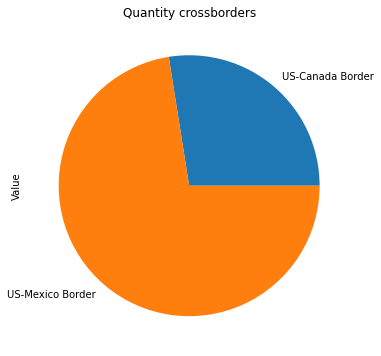

In [11]:
pie_data = crossborder_cnt['Value']
ax = pie_data.plot(kind='pie',
                   title='Quantity crossborders')

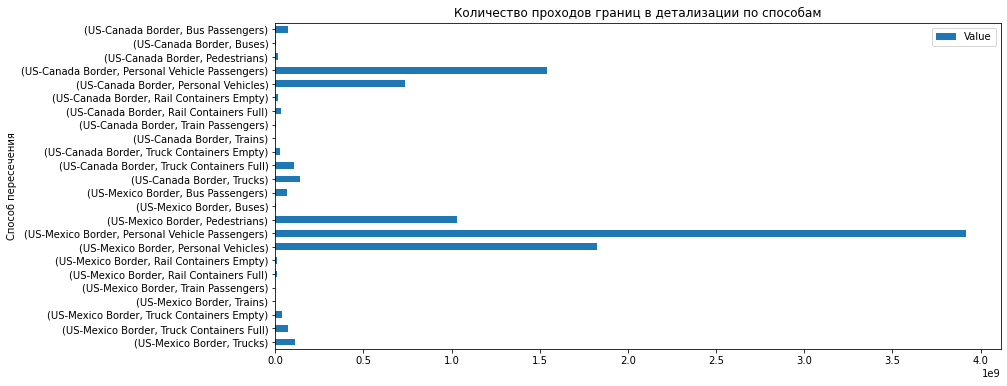

In [15]:
# количество случаев проходов границ в детализации по способам 
type_crossborder_cnt = df[['Border', 'Measure', 'Value']].groupby(['Border', 'Measure']).sum().sort_values(by=['Border', 'Measure'], ascending=False)
ax = type_crossborder_cnt.plot(kind='barh', title='Количество проходов границ в детализации по способам',
                                xlabel='Способ пересечения', 
                                ylabel='Количество')

как можно заметить основное количество перечений границы осуществлено на личном транспорте и их пассарижами.

In [17]:
# как изменялось количество пересечений границы по годам
crossborder_years = df[['Border', 'Measure', 'year', 'month', 'Value']]
crossborder_years

,Border,Measure,year,month,Value
0,US-Mexico Border,Trucks,2019,1,34447
1,US-Canada Border,Rail Containers Full,2019,1,428
2,US-Mexico Border,Trucks,2019,1,81217
3,US-Mexico Border,Trains,2019,1,62
4,US-Canada Border,Personal Vehicle Passengers,2019,1,16377
...,...,...,...,...,...
346728,US-Canada Border,Personal Vehicle Passengers,1996,1,9119
346729,US-Mexico Border,Personal Vehicles,1996,1,29486
346730,US-Canada Border,Rail Containers Full,1996,1,0
346731,US-Mexico Border,Buses,1996,1,0


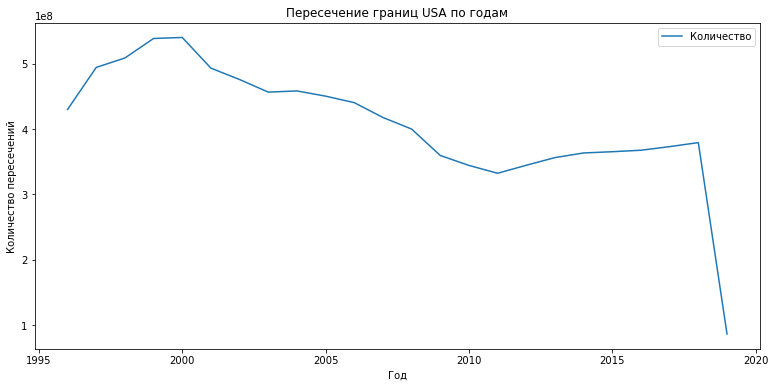

In [20]:
dynamics_by_years = crossborder_years[['year', 'Value']].groupby('year').sum().sort_values('year', ascending=False)
ax = dynamics_by_years.rename(columns={'Value': 'Количество'}).plot(title='Пересечение границ USA по годам', 
                                        xlabel='Год', 
                                        ylabel='Количество пересечений')

In [28]:
dynamics_borders_by_years = crossborder_years[['year', 'Border', 'Value']].groupby(['year', 'Border']).sum().sort_values(by=['year', 'Border'], ascending=True)


In [39]:
dynamics_borders_by_years.assign(idx=dynamics_borders_by_years.groupby('Border').cumcount())

Value  idx
year Border                          
1996 US-Canada Border  153038903    0
     US-Mexico Border  276751448    0
1997 US-Canada Border  145512710    1
     US-Mexico Border  348661488    1
1998 US-Canada Border  142294090    2
     US-Mexico Border  366296614    2
1999 US-Canada Border  146497328    3
     US-Mexico Border  391959396    3
2000 US-Canada Border  147789673    4
     US-Mexico Border  392231869    4
2001 US-Canada Border  130092391    5
     US-Mexico Border  362991511    5
2002 US-Canada Border  122832695    6
     US-Mexico Border  352870123    6
2003 US-Canada Border  112738414    7
     US-Mexico Border  343654239    7
2004 US-Canada Border  114695622    8
     US-Mexico Border  343524676    8
2005 US-Canada Border  113243701    9
     US-Mexico Border  336990567    9
2006 US-Canada Border  112707996   10
     US-Mexico Border  327588026   10
2007 US-Canada Border  107491421   11
     US-Mexico Border  310095754   11
2008 US-Canada Border  103980803   12
     US-Mexico Border  295921230   12
2009 US-Canada Border   95001517   13
     US-Mexico Border  264450245   13
2010 US-Canada Border  101469642   14
     US-Mexico Border  242776894   14
2011 US-Canada Border  106684911   15
     US-Mexico Border  225541089   15
2012 US-Canada Border  111504252   16
     US-Mexico Border  232999664   16
2013 US-Canada Border  112236211   17
     US-Mexico Border  243982227   17
2014 US-Canada Border  108567839   18
     US-Mexico Border  254746277   18
2015 US-Canada Border   97556562   19
     US-Mexico Border  267663436   19
2016 US-Canada Border   93951778   20
     US-Mexico Border  273532405   20
2017 US-Canada Border   94268274   21
     US-Mexico Border  278703002   21
2018 US-Canada Border   95414333   22
     US-Mexico Border  283743197   22
2019 US-Canada Border   18391728   23
     US-Mexico Border   67956671   23

In [71]:
dynamics_borders_by_years = dynamics_borders_by_years.assign(idx=dynamics_borders_by_years.groupby('year').cumcount()) \
                        .pivot_table(index='year', columns='Border', values='Value', aggfunc='sum')

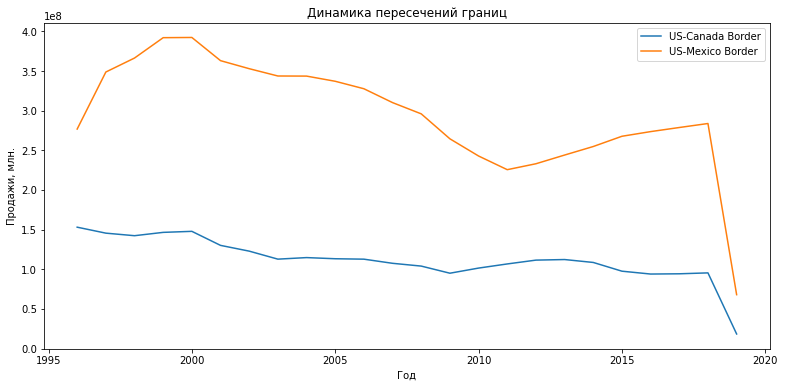

In [73]:
# plot без цикла построит графики для каждого региона (столбца)
for region in [x for x in dynamics_borders_by_years.columns if 'Border' in x]:
    plt.plot(dynamics_borders_by_years.index, dynamics_borders_by_years[region])
    plt.title('Динамика пересечений границ')
    plt.xlabel('Год')
    plt.ylabel('Количество пересечений') 
    plt.legend(dynamics_borders_by_years)

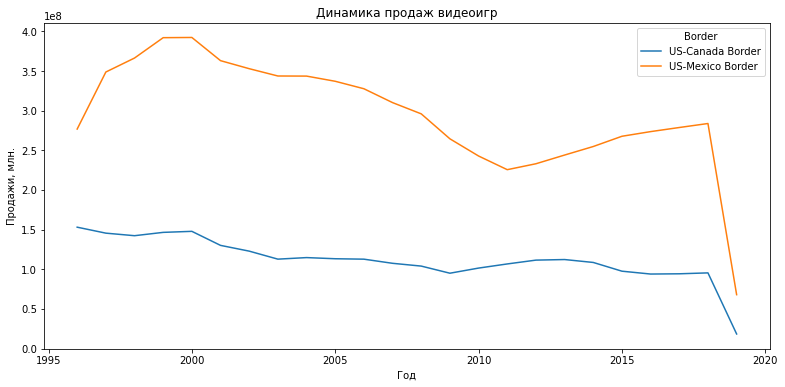

In [72]:
# тоже без цикла
ax = dynamics_borders_by_years.plot(title='Динамика пересечений границ', 
                             xlabel='Год', 
                             ylabel='Количество пересечений')